### Problem 1: Clustering

### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
df=pd.read_csv("bank_marketing.csv")

In [284]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [286]:
df.shape

(210, 7)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [290]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [292]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [294]:
df.duplicated().sum()

0

<Figure size 720x720 with 0 Axes>

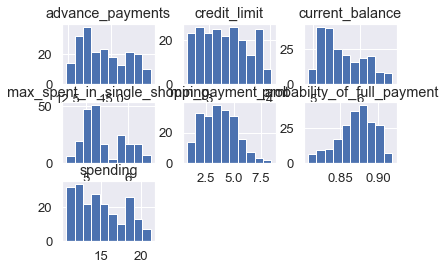

In [296]:
plt.figure(figsize=(10,10))
df.hist()
plt.show()

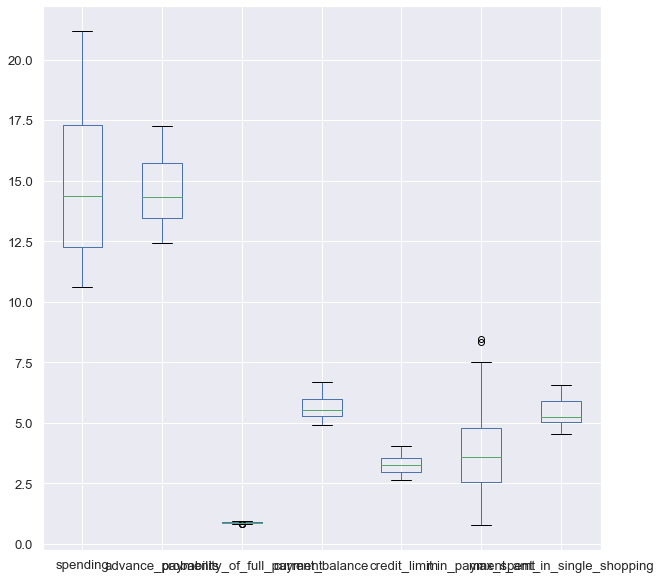

In [298]:
plt.figure(figsize=(10,10))
df.boxplot(vert='h')

1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes because the values are scaled in 1000s and 100s and that may affect the clustering

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [300]:
from sklearn.preprocessing import StandardScaler

In [302]:
X = StandardScaler()

In [304]:
scaled_df = X.fit_transform(df)

In [306]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [308]:
wardlink = linkage(scaled_df, method = 'ward')

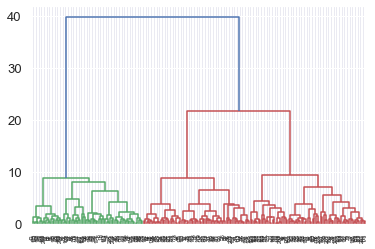

In [310]:
dend = dendrogram(wardlink)

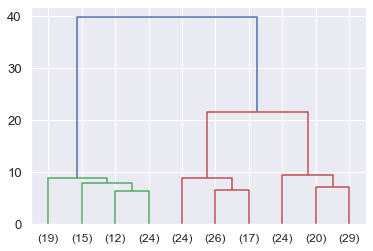

In [312]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,)

In [314]:
from scipy.cluster.hierarchy import fcluster

In [316]:
clusters = fcluster(wardlink, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [318]:
df['clusters'] = clusters

In [320]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.b

In [322]:
from sklearn.cluster import KMeans

In [324]:
k_means=KMeans(n_clusters=2)

In [330]:
k_means.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [331]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [332]:
k_means.inertia_

659.1717544870407

In [333]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.65897315130053

In [334]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.301721277542

In [335]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1470.0

In [336]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

327.2127816566136

In [337]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.44493899621074

Calculating WSS for other values of K - Elbow Method

In [338]:
wss =[] 

In [339]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [340]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.301721277542,
 327.72284283825405,
 290.6696182373522,
 261.9322366324021,
 241.36206861289776,
 223.7956800060902,
 204.58317068879356]

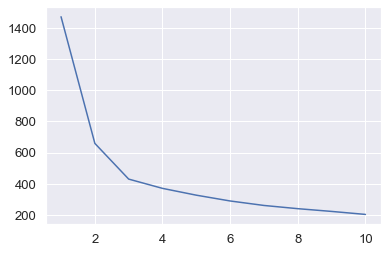

In [341]:
plt.plot(range(1,11), wss)

In [342]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

### Cluster evaluation for 2 clusters: the silhouette score

In [343]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [344]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels)

0.46577247686580914

KMeans with K=2

In [345]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_df)
labels = k_means.labels_

In [346]:
silhouette_score(scaled_df,labels)

0.46577247686580914

In [347]:
df["Clus_kmeans2"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [348]:
df.Clus_kmeans2.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans2, dtype: int64

In [349]:
clust_profile=df.drop(['clusters'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans2').mean()
clust_profile['freq']=df.Clus_kmeans2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans2,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


Cluster 0: People with relatively lower per month spending,current balance,credit limit and max spent in single and higher minimum payment amount
Cluster 1: People with higher per month spending

### Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.


In [350]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [351]:
df1=pd.read_csv("insurance.csv")

In [352]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [353]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [354]:
df1.shape

(3000, 10)

In [355]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [356]:
dup=df1[df1.duplicated()]
dup

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [357]:
df1.drop('Agency_Code',axis=1, inplace=True)

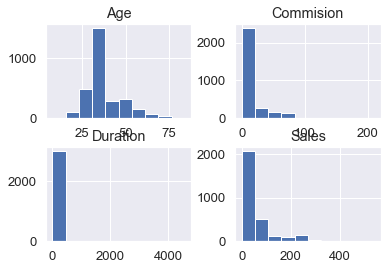

In [358]:
df1.hist()
plt.show()

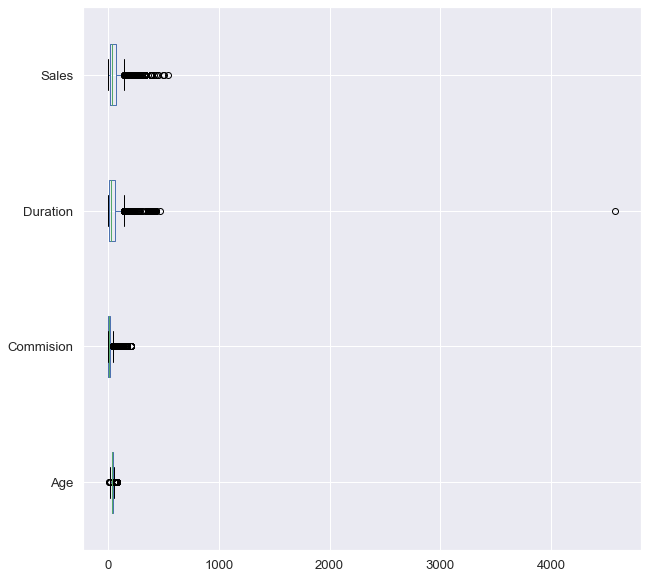

In [359]:
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)

In [360]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*(IQR))
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [361]:
for feature in df1[['Sales', 'Duration', 'Commision', 'Age']]: 
    lr,ur=treat_outlier(df1[feature])
    df1[feature]=np.where(df1[feature]>ur,ur,df1[feature])
    df1[feature]=np.where(df1[feature]<lr,lr,df1[feature])

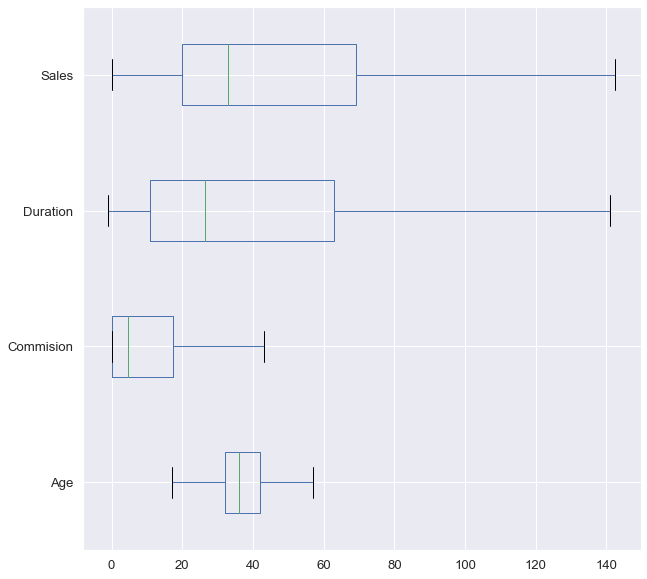

In [362]:
plt.figure(figsize=(10,10))
df1.boxplot(vert=0)

In [363]:
for column in df1[['Type', 'Claimed','Channel', 'Product Name', 'Destination']]:
    print(column.upper(),': ',df1[column].nunique())
    print(df1[column].value_counts().sort_values())
    print('\n')

TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




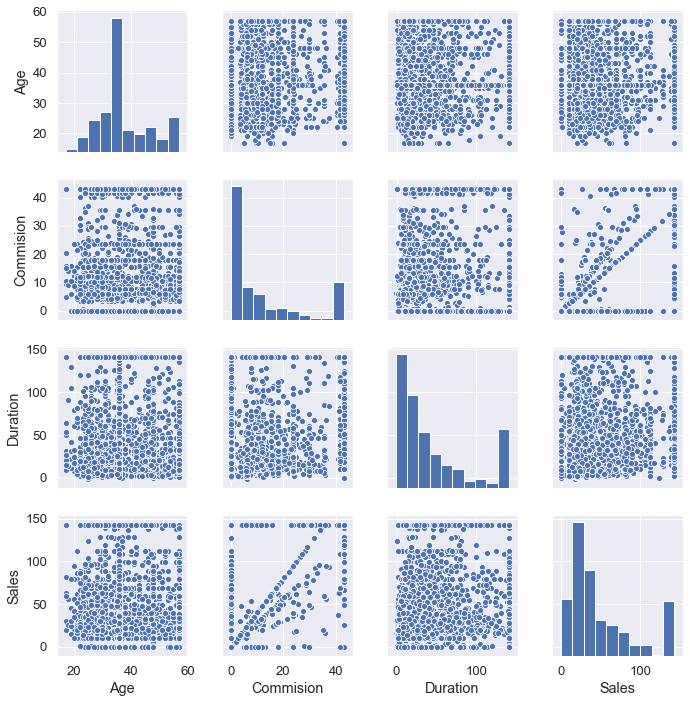

In [364]:
sns.pairplot(df1)

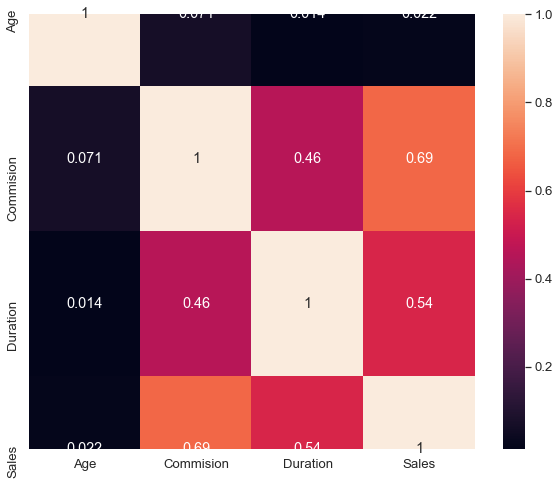

In [135]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.2)
sns.heatmap(df1[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

## Converting all objects to categorical codes

In [365]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
Age             3000 non-null float64
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(4), object(5)
memory usage: 211.1+ KB


In [366]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        df1[feature] = pd.Categorical(df1[feature]).codes

In [367]:
df1.head()

,Age,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,0,5.94,1,3.0,9.90,2,1
3,36.0,1,0,0.00,1,4.0,26.00,1,0
4,33.0,0,0,6.30,1,53.0,18.00,0,0


In [368]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
Age             3000 non-null float64
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(5)
memory usage: 108.5 KB


2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


#### Proportion of 1s and 0s

In [369]:
df1.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

#### Extracting the target column into separate vectors for training set and test set

In [370]:
x = df1.drop("Claimed", axis=1)

y = df1.pop("Claimed")

x.head()

,Age,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0.70,1,7.0,2.51,2,0
1,36.0,1,0.00,1,34.0,20.00,2,0
2,39.0,1,5.94,1,3.0,9.90,2,1
3,36.0,1,0.00,1,4.0,26.00,1,0
4,33.0,0,6.30,1,53.0,18.00,0,0


#### Splitting data into training and test set

In [371]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=0)

#### Checking the dimensions of the training and test data

In [372]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2100, 8)
x_test (900, 8)
train_labels (2100,)
test_labels (900,)


In [373]:
#Scaling the data
X = StandardScaler() 
X_trains = X.fit_transform(x_train) 
X_tests = X.transform (x_test)

#### Building a Decision Tree Classifier

In [378]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,6],
    'min_samples_leaf': [30,32], #100,150
    'min_samples_split': [60,75], #150,300
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [379]:
grid_search.fit(x_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 75}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=75,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Generating Tree

In [380]:
from sklearn import tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

#### Variable Importance

In [381]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.565465
Sales         0.204415
Commision     0.164368
Duration      0.039483
Age           0.017061
Destination   0.009208
Type          0.000000
Channel       0.000000


#### Predicting on Training and Test dataset

In [382]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

#### Getting the Predicted Classes and Probs

In [383]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.918367,0.081633
1,0.326087,0.673913
2,1.000000,0.000000
3,0.390625,0.609375
4,0.806452,0.193548


### Model Evaluation

AUC and ROC for the training data

AUC: 0.832


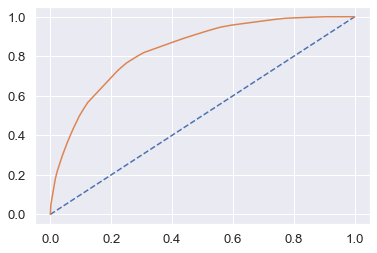

In [384]:
# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

### AUC and ROC for the test data

AUC: 0.813


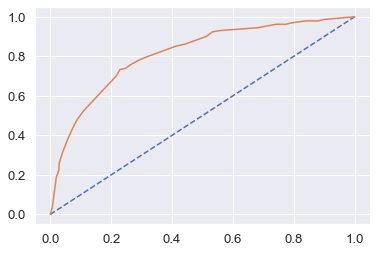

In [385]:
# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

#### Confusion Matrix for the training data

In [386]:
confusion_matrix(train_labels, ytrain_predict)

array([[1284,  180],
       [ 276,  360]])

In [387]:
cart_train_acc=best_grid.score(x_train,train_labels) 
cart_train_acc

0.7828571428571428

In [388]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1464
           1       0.67      0.57      0.61       636

    accuracy                           0.78      2100
   macro avg       0.74      0.72      0.73      2100
weighted avg       0.78      0.78      0.78      2100



In [389]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_recall ',cart_train_precision)
print ('cart_train_f1 ',cart_train_recall)
print ('cart_train_precision ',cart_train_f1)

cart_train_recall  0.57
cart_train_f1  0.61
cart_train_precision  0.67


### Confusion Matrix for test data

In [390]:
confusion_matrix(test_labels, ytest_predict)

array([[545,  67],
       [137, 151]])

In [391]:
#Test Data Accuracy
cart_test_acc=best_grid.score(x_test,test_labels)
cart_test_acc

0.7733333333333333

In [392]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       612
           1       0.69      0.52      0.60       288

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [406]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_train_recall ',cart_test_precision)
print ('cart_train_f1 ',cart_test_recall)
print ('cart_train_precision ',cart_test_f1)

cart_train_recall  0.52
cart_train_f1  0.6
cart_train_precision  0.69


## Cart Conclusion

<b>Train Data:</b>  
    AUC: 83.9%        
    Accuracy: 79.0%        
    Sensitivity: 61%     
    Precision: 67%        
    f1-Score: 64%       
            
<b>Test Data:</b>      
    AUC: 81.4%      
    Accuracy:78.2%      
    Sensitivity: 58%    
    Precision: 69%       
    f1-Score: 63%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  
  
Product name is the most important variable for predicting diabetes

### Building a Random Forest Classifier 

In [432]:
param_grid = {
    'max_depth': [22,24],
    'max_features': [7],
    'min_samples_leaf': [8,9],
    'min_samples_split': [30],
    'n_estimators': [101]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [433]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [431]:
grid_search.best_params_

{'max_depth': 22,
 'max_features': 7,
 'min_samples_leaf': 9,
 'min_samples_split': 30,
 'n_estimators': 101}

In [434]:
best_grid = grid_search.best_estimator_

In [435]:
best_grid

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=24, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predicting the Training and Testing data

In [436]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

#### RF Model Performance Evaluation on Training data

In [437]:
confusion_matrix(train_labels,ytrain_predict)

array([[1330,  134],
       [ 253,  383]])

In [438]:
rf_train_acc=best_grid.score(x_train,train_labels) 
rf_train_acc

0.8157142857142857

In [439]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1464
           1       0.74      0.60      0.66       636

    accuracy                           0.82      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [440]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.6
rf_train_recall  0.66
rf_train_f1  0.74


Area under Curve is 0.7553356016084132


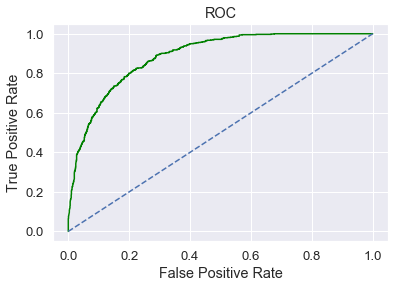

In [441]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(x_train))
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

In [442]:
confusion_matrix(test_labels,ytest_predict)

array([[555,  57],
       [145, 143]])

In [443]:
rf_test_acc=best_grid.score(x_test,test_labels)
rf_test_acc

0.7755555555555556

In [444]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       612
           1       0.71      0.50      0.59       288

    accuracy                           0.78       900
   macro avg       0.75      0.70      0.72       900
weighted avg       0.77      0.78      0.76       900



In [445]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.5
rf_test_recall  0.59
rf_test_f1  0.72


Area under Curve is 0.7016952614379084


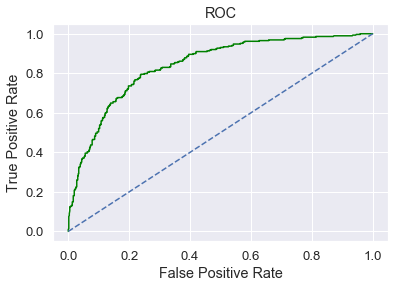

In [446]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(x_test))
print('Area under Curve is', rf_test_auc)

In [447]:
#Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.396582
Sales         0.200340
Commision     0.147437
Duration      0.126732
Age           0.090957
Type          0.022282
Destination   0.014420
Channel       0.001251


## Random Forest Conclusion

<b> Train Data: </b>
AUC: 77.4%
Accuracy: 83%
Sensitivity: 63%
Precision: 76%
f1-Score: 69%

<b> Test Data: </b>
AUC: 70.6%
Accuracy: 77.7%
Sensitivity: 51%
Precision: 72%
f1-Score: 59%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Product Name is again the most important variable for predicting diabetes

### MLP Classifier (Artificial Neural Network

In [448]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}
mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [449]:
grid_search.fit(X_trains, train_labels)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
     

In [450]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.1}

In [451]:
best_grid = grid_search.best_estimator_

#### Predicting the Training and Testing data

In [452]:
ytrain_predict = best_grid.predict(X_trains)
ytest_predict = best_grid.predict(X_tests)

#### NN Model Performance Evaluation on Training data

In [453]:
confusion_matrix(train_labels,ytrain_predict)

array([[1344,  120],
       [ 347,  289]])

In [454]:
nn_train_acc=best_grid.score(X_trains,train_labels) 
nn_train_acc

0.7776190476190477

In [455]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1464
           1       0.71      0.45      0.55       636

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.70      2100
weighted avg       0.77      0.78      0.76      2100



In [456]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.45
nn_train_recall  0.55
nn_train_f1  0.71


Area under Curve is 0.6862176513042582


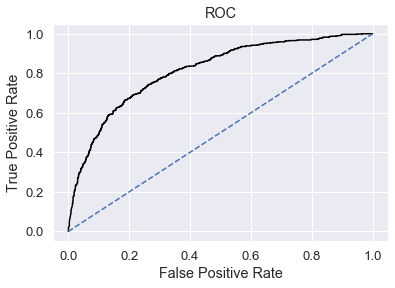

In [457]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_trains))
print('Area under Curve is', nn_train_auc)

#### NN Model Performance Evaluation on Test data

In [458]:
confusion_matrix(test_labels,ytest_predict)

array([[568,  44],
       [170, 118]])

In [459]:
nn_test_acc=best_grid.score(X_tests,test_labels)
nn_test_acc

0.7622222222222222

In [460]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       612
           1       0.73      0.41      0.52       288

    accuracy                           0.76       900
   macro avg       0.75      0.67      0.68       900
weighted avg       0.76      0.76      0.74       900



In [461]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.41
nn_test_recall  0.52
nn_test_f1  0.73


Area under Curve is 0.6689133986928105


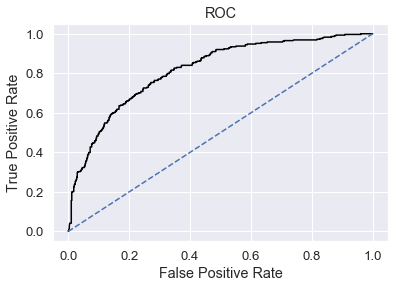

In [462]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_tests))
print('Area under Curve is', nn_test_auc)

# Neural Network Conclusion

<b>Train Data:</b>  
    AUC: 67%        
    Accuracy: 77%        
    Sensitivity: 41%     
    Precision: 72%        
    f1-Score: 53%       
            
<b>Test Data:</b>      
    AUC: 65%      
    Accuracy: 75%      
    Sensitivity: 36%    
    Precision: 73%       
    f1-Score: 49%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

In [466]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.77,0.82,0.78,0.78,0.76
AUC,0.83,0.81,0.76,0.70,0.69,0.67
Recall,0.61,0.60,0.66,0.59,0.55,0.52
Precision,0.57,0.52,0.60,0.50,0.45,0.41
F1 Score,0.67,0.69,0.74,0.72,0.71,0.73


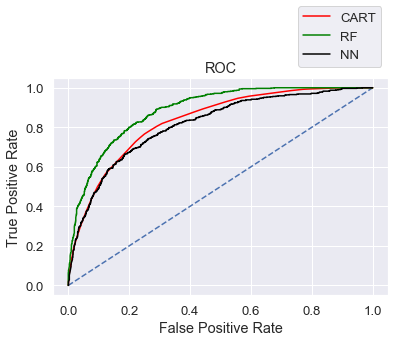

In [464]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

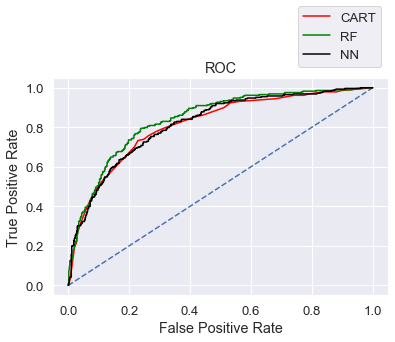

In [465]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model


2.4 Final Model: Compare all the model and write an inference which model is best/optimized.


2.5 Inference: Basis on these predictions, what are the business insights and recommendationsm